Verificando/Criando a pasta de destino: Imagens_Filtradas
Carregando a imagem: Imagens_Atividades\FIG034_3.TIF
Aplicando filtro da média com kernel 5x5...


C:\Users\User\AppData\Local\Temp\ipykernel_6628\2935434895.py:36: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  kernel = morphology.square(TAMANHO_KERNEL)


Analisando o histograma e aplicando a limiarização de Otsu...
Salvando imagens resultantes...
Exibindo resultados...


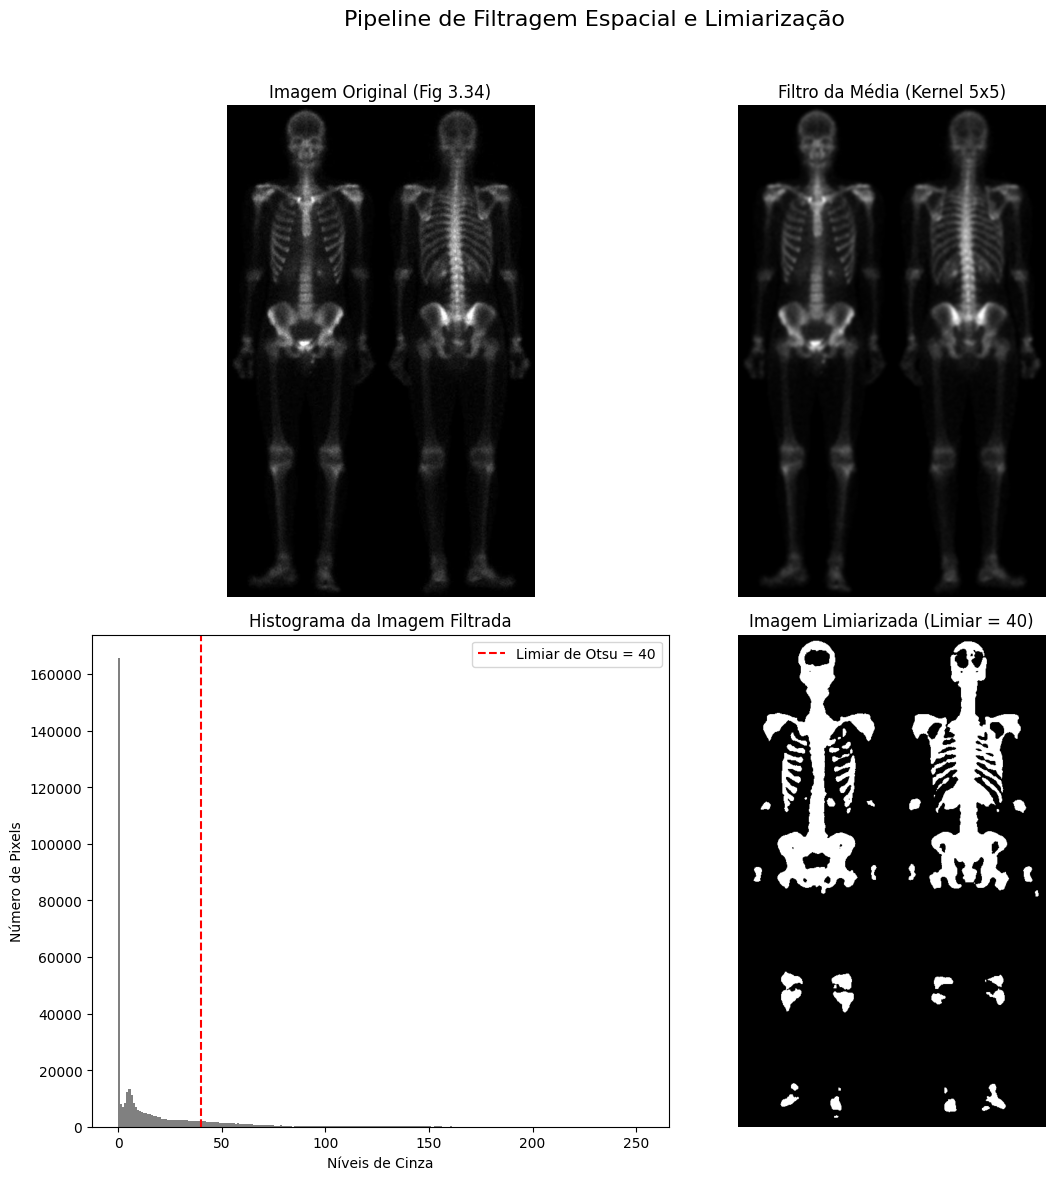


Processo Finalizado!


In [ ]:
# Passo 1: Importar as bibliotecas necessárias
import os
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology
from skimage.util import img_as_ubyte, img_as_float

# --- SEÇÃO DE CONFIGURAÇÃO ---
# Nome da pasta onde você salvou a imagem
PASTA_ENTRADA = 'Imagens_Atividades'

# Nome do arquivo da imagem que você salvou
NOME_IMAGEM_ENTRADA = 'FIG034_3.TIF'

# Tamanho do kernel (máscara) para o filtro da média. Deve ser um valor ímpar.
TAMANHO_KERNEL = 5

# Pasta onde salvaremos os resultados
PASTA_SAIDA = 'Imagens_Filtradas'
# --------------------------------

# Passo 2: Preparar pastas e caminhos
print(f"Verificando/Criando a pasta de destino: {PASTA_SAIDA}")
os.makedirs(PASTA_SAIDA, exist_ok=True)
caminho_imagem_entrada = os.path.join(PASTA_ENTRADA, NOME_IMAGEM_ENTRADA)

# Passo 3: Carregar a imagem e garantir que está em níveis de cinza (8-bit)
print(f"Carregando a imagem: {caminho_imagem_entrada}")
imagem_original = io.imread(caminho_imagem_entrada)

# Converte para float para processamento e depois para 8-bit (0-255) para consistência
imagem_cinza = img_as_ubyte(img_as_float(imagem_original))

# Passo 4: Aplicar o filtro da média
print(f"Aplicando filtro da média com kernel {TAMANHO_KERNEL}x{TAMANHO_KERNEL}...")
# Criamos um "elemento estruturante" quadrado que será a nossa máscara
kernel = morphology.square(TAMANHO_KERNEL)
# Aplicamos o filtro da média
imagem_filtrada = filters.rank.mean(imagem_cinza, footprint=kernel)

# Passo 5: Limiarização baseada no histograma
print("Analisando o histograma e aplicando a limiarização de Otsu...")
# O método de Otsu encontra um limiar ideal para separar o fundo do objeto.
limiar_otsu = filters.threshold_otsu(imagem_filtrada)

# Criamos a imagem binária (preto e branco)
imagem_binaria = imagem_filtrada > limiar_otsu
imagem_binaria_8bit = img_as_ubyte(imagem_binaria) # Converte de True/False para 255/0

# Passo 6: Salvar as imagens resultantes
print("Salvando imagens resultantes...")
nome_base = NOME_IMAGEM_ENTRADA.split('.')[0]
io.imsave(os.path.join(PASTA_SAIDA, f'{nome_base}_filtrada.jpg'), imagem_filtrada)
io.imsave(os.path.join(PASTA_SAIDA, f'{nome_base}_binarizada.jpg'), imagem_binaria_8bit)

# Passo 7: Visualizar todo o processo
print("Exibindo resultados...")
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Imagem Original
axes[0, 0].imshow(imagem_cinza, cmap='gray')
axes[0, 0].set_title('Imagem Original (Fig 3.34)')
axes[0, 0].axis('off')

# Imagem Filtrada
axes[0, 1].imshow(imagem_filtrada, cmap='gray')
axes[0, 1].set_title(f'Filtro da Média (Kernel {TAMANHO_KERNEL}x{TAMANHO_KERNEL})')
axes[0, 1].axis('off')

# Histograma da imagem filtrada com o limiar de Otsu
axes[1, 0].hist(imagem_filtrada.ravel(), bins=256, color='gray')
axes[1, 0].set_title('Histograma da Imagem Filtrada')
axes[1, 0].axvline(limiar_otsu, color='r', linestyle='--')
axes[1, 0].legend([f'Limiar de Otsu = {limiar_otsu}'])
axes[1, 0].set_xlabel("Níveis de Cinza")
axes[1, 0].set_ylabel("Número de Pixels")

# Imagem Final Binarizada
axes[1, 1].imshow(imagem_binaria, cmap='gray')
axes[1, 1].set_title(f'Imagem Limiarizada (Limiar = {limiar_otsu})')
axes[1, 1].axis('off')

fig.suptitle('Pipeline de Filtragem Espacial e Limiarização', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\nProcesso Finalizado!")